# LSTM Networks for Sentiment Analysis with Keras: Guide for Complete Beginners

# What is Keras?

Deep learning is one of the hottest fields in data science. Keras is one of the most powerful Python for devolping deep learning models and it is very user-friendly. 

Keras supports multiple backend engines:
* The TensorFlow backend (from Google)
* The CNTK backend (from Microsoft)
* The Theano backend
* MXNet backend (from Amazon)

Keras Documentation:https://keras.io/

# Why Keras?

* You can easily build and test a neural network model with just several lines of code.
* You cannot do such a easy job by Tensorflow. (More time to go through the documentation and more lines to code.)

# Installation

* Notice that TensorFlow is only supported with Python 3.5 and 3.6 for 64-bit windows. But my python version is 2.7. 
* To use TensorFlow as the backend, we need to create a new environment for Python 3.6 in Anaconda Prompt. 
* See: https://conda.io/docs/user-guide/tasks/manage-python.html

### step 1: Create a new environment and install Python 3.6

conda create -n py36 python=3.6 anaconda

### step 2: Activate the new environment.
* On Windows, in your Anaconda Prompt, to activate this environment, use:
activate py36

* To deactivate an active environment, use:
deactivate

### step 3: Install TensorFlow

* The manual of TensorFlow confused me as a beginner.
* I recommend the video below to anyone for this step. 

**Check this out. It is very easy to follow.**

https://medium.com/@viveksingh.heritage/how-to-install-tensorflow-gpu-version-with-jupyter-windows-10-in-8-easy-steps-8797547028a4

In [9]:
# we upgrade pip first
# python -m pip install --upgrade pip

# then we can use pip3 to install TensorFlow
# pip3 install --upgrade tensorflow

### step 4: Install the following optional dependencies:

#### Reference: https://keras.io/
* cuDNN (recommended if you plan on running Keras on GPU)
* HDF5 and h5py (required if you plan on saving Keras models to disk).
* graphviz and pydot (used by visualization utilities to plot model graphs).

#### Install cuDNN (You don't need to if you don't have GPU in your computer.)

* cuDNN Installation guide:https://docs.nvidia.com/deeplearning/sdk/cudnn-install/. Check ** part 3:Installing cuDNN on Windows** for details.
* Find and download the right driver for your GPU. For example, my GPU is NVIDIA GeForce 1060 and it's windows 10 64-bit. I will download the driver according to this information.
* Install the driver and restart your system to ensure the driver takes effect.
* Download and install CUDA toolkit for Windows. Make sure you intall the base installer and all patches. (I install the latest 9.1 version)
* Download and install cuDNN for CUDA 9.1 for Windows 10.

#### install h5py
* pip install h5py

#### install graphviz 
* pip install graphviz

#### install pydot
* pip install pydot

In [10]:
%%html
<img src = "https://c2.staticflickr.com/6/5259/5457536703_fd22ca16ca_b.jpg">

### step 5: Update Keras to use TensorFlow as backend

In [12]:
# import Tensorflow before using Keras.
import tensorflow as tf

# check if your computer identifies the GPU or CPU. 
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

import keras

# set the backend.
from keras import backend as K
K.set_session(sess)

### Can Keras with Tensorflow backend be forced to use CPU or GPU at will?

Yes it can! 
See: https://stackoverflow.com/questions/40690598/can-keras-with-tensorflow-backend-be-forced-to-use-cpu-or-gpu-at-will

# Background Knowledge of LSTM Network

###  Long-term memory can loss

In [13]:
%%html
<img src = "https://www.learningsolutionsmag.com/assets/images/learningsolutions/2014/140410/1400-figure1.jpg">

According to Ebbinghaus forgetting curve, the strength of memory declines as the time goes by. We should transfer our short-term memory to long-term memory in order to improve our memory.

In the deep learning, we train the algorithm by feeding tons of data to it. To improve the performance, it need to has better learning method (i.e., better structure in the algorithm) to enhance the memory. LSTM network is one of the most popular deep learning algorithms which is specilized to recognize and classify human actions. 

### LSTM Network- A Special Type of RNN Network

The traditional RNN (Recurrent Neutral Network) model depends on long-term memory. It seeks to establish the connetction between the final output with the events many steps before. Discrepancies of events are related to each other and carry through multiplication in the gradient. Thus, eventally, the gradient is susceptible to exploding (if the discrepancies are large) or vanishing (if the discrepancies in the previous events are small) so that degrade recurrent net performance. In short, the classical RNN's momery retention will go down with long sequence learning. 

To slove the "vanishing gradient" problem in the RNN, Hochreiter and Schmidhuber (1997) introduce a new structure called "memory cell" in the RNN. 

The memory cell contains four main elements: input gate, forget gate, output gate and self-recurrent connection. (** see detailed explaination ** in http://deeplearning.net/tutorial/lstm.html#code)

This RNN model with memory cell is called ** LSTM (long-short term memory) ** model. It allows machine to maintain very good short-term memory and adds a forgetting mechanism which is tolernce of 'errors' in the events long time ago.


Video tutorial:
* https://www.youtube.com/watch?v=y7qrilE-Zlc


Other References: 

* http://blog.echen.me/2017/05/30/exploring-lstms/
* https://medium.com/mlreview/understanding-lstm-and-its-diagrams-37e2f46f1714
* http://colah.github.io/posts/2015-08-Understanding-LSTMs/
* https://www.topbots.com/exploring-lstm-tutorial-part-1-recurrent-neural-network-deep-learning/
* https://www.topbots.com/exploring-lstm-tutorial-part-2-recurrent-neural-network-deep-learning/
* https://www.researchgate.net/publication/13853244_Long_Short-term_Memory

#### The Stucture of LSTM Network

In [14]:
%%html
<img src = "http://i.imgur.com/EGZIUuc.pngg">

* The network in LSTM is keeping updated.

#### The Structure of memory cell of LSTM

In [15]:
%%html
<img src = "http://www.techenablement.com/wp-content/uploads/2014/12/Screenshot-from-2014-12-04-091437.png">

###  What LSTM can do?

* Speech recognition
* Handwriting recognition
* Image captioning
* ....


See: https://www.quora.com/What-are-the-various-applications-where-LSTM-networks-have-been-successfully-used

# Discription

### Data
* This data originally came from Sentiment140 dataset. (See: https://www.kaggle.com/kazanova/sentiment140).
* Here, the dataset contains about 1.5 million tweets, each is marked as either 1 for positive sentiment or 0 for negative sentiment. (See: http://thinknook.com/twitter-sentiment-analysis-training-corpus-dataset-2012-09-22/).

### Code
I adapt, combine and modify codes from the following articles:
* https://dzone.com/articles/sentiment-analysis-on-us-twitter-airlines-dataset.
* https://machinelearningmastery.com/evaluate-performance-deep-learning-models-keras/
* https://keras.io/getting-started/sequential-model-guide/#training
* https://pandas.pydata.org/pandas-docs/stable/text.html
* https://github.com/keras-team/keras/issues/8315 
* https://stackoverflow.com/questions/47663759/reshaping-train-and-test-sets-for-lstms-in-keras

# Let's play with Keras!

In [16]:
# import packages
import re
import multiprocessing
import csv
import pandas as pd
import numpy as np
import os
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer 
from keras.layers.merge import concatenate
from keras.models import Sequential, Model
from keras.layers import Dense, Embedding, Activation, merge, Input, Lambda, Reshape
from keras.layers import Convolution1D, Flatten, Dropout, MaxPool1D, GlobalAveragePooling1D
from keras.layers import LSTM, GRU, TimeDistributed, Bidirectional
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras import initializers
from keras.engine.topology import Layer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

### Load the data

In [17]:
tweets=pd.read_csv('data/tweets_Sanders.csv', sep=',',low_memory=False)
tweets.head(10)

,ItemID,Sentiment,SentimentSource,SentimentText,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,1,0,Sentiment140,is so sad for my APL frie...,NaN,NaN,NaN
1,2,0,Sentiment140,I missed the New Moon trail...,NaN,NaN,NaN
2,3,1,Sentiment140,omg its already 7:30 :O,NaN,NaN,NaN
3,4,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I'...,NaN,NaN,NaN
4,5,0,Sentiment140,i think mi bf is cheating on me!!! ...,NaN,NaN,NaN
5,6,0,Sentiment140,or i just worry too much?,NaN,NaN,NaN
6,7,1,Sentiment140,Juuuuuuuuuuuuuuuuussssst Chillin!!,NaN,NaN,NaN
7,8,0,Sentiment140,Sunny Again Work Tomorrow :-| ...,NaN,NaN,NaN
8,9,1,Sentiment140,handed in my uniform today . i miss you ...,NaN,NaN,NaN
9,10,1,Sentiment140,hmmmm.... i wonder how she my number @-),NaN,NaN,NaN


In [18]:
# Select only interesting columns.
data = tweets[['Sentiment','SentimentText']]
data.head(5)

,Sentiment,SentimentText
0,0,is so sad for my APL frie...
1,0,I missed the New Moon trail...
2,1,omg its already 7:30 :O
3,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,0,i think mi bf is cheating on me!!! ...


In [19]:
# summary statistics
byclass = data.groupby('Sentiment')
byclass['Sentiment'].describe()

,count,mean,std,min,25%,50%,75%,max
Sentiment,,,,,,,,
0,494105.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,554470.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


**The original dataset has around 1.5 million tweets. We will only use a subset of it in this tutorial.**

In [32]:
# set random seed for output reproduction.
seed = 7
np.random.seed(seed)

# random sample from the original dataset.
datasub=data.sample(frac=0.1, replace=True)

# summary statistics
byclass = datasub.groupby('Sentiment')
byclass['Sentiment'].describe()

,count,mean,std,min,25%,50%,75%,max
Sentiment,,,,,,,,
0,49629.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,55229.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


### Text preprocessing

In [33]:
# convert to lower case 
datasub['SentimentText'] = datasub['SentimentText'].apply(lambda x: x.lower())

# remove urls, user mentions, and hashtags
datasub['SentimentText'] = datasub['SentimentText'].apply((lambda x: re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(#[A-Za-z0-9]+)','',x)))

In [34]:
# create a dupliate column of tweets
datasub['clean']=datasub['SentimentText']

In [35]:
# remove stopwords
# if you want to remove extra stopwords in tweets, see the list in https://sites.google.com/site/iamgongwei/home/sw.
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
datasub['clean']=datasub.clean.apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

# remove numbers and other non-words
datasub['clean']=datasub.clean.str.replace('[^a-zA-Z]+', ' ')

In [36]:
datasub['clean'].head(10)

585903                                doc grandma shes sick
189636    w lol wish could read tweets small dose get lo...
573977     family learning workshops week clay plaques b...
535030                god damn superduper chronic insomniac
759363    going uncles house place week ago come argenti...
839891                            adore computer crazy slow
328599                     next week dz bday weekend though
79463     oh yum mine new zealand mount cass sauvignon b...
886108                          im scince doning coursework
650425    enjoying hamptonsvery relaxing saturdayall smi...
Name: clean, dtype: object

In [37]:
# max_review_length is the number of unique words in the sequence.
max_review_length=4000

tokenizer = Tokenizer(num_words=max_review_length, split=' ')
tokenizer.fit_on_texts(datasub['clean'].values)
X = tokenizer.texts_to_sequences(datasub['clean'].values)
X = pad_sequences(X)

In [38]:
# check the input shape
X.shape

(104858, 28)

* The shape returns to the dimensions of the array. x.shape[0] is the number of rows. x.shape[1] is the number of columns.
* input shape= X.shape[1] in this example.
* Regarless how many rows of tweets we have, each tweet has the same shape.

## Simple LSTM

### Step 1: Build a Sequential model with one layer of LSTM

In [55]:
embedding_vecor_length = 28
# In this case, the unique 4000 words can create tweet of maximum 23 unique words. 
# Now, we turn each of these 22 words into vector of size 16.

lstm_dim = 32
# return a single vector of dimension 32

model = Sequential()

# input layer with the dropout rate=0.2
model.add(Embedding(max_review_length, embedding_vecor_length ,input_length = X.shape[1]))
model.add(Dropout(0.5))

# first hidden layer
model.add(LSTM(lstm_dim, dropout=0.2, recurrent_dropout=0.2)) 
# the input dropout rate is 0.2 and the recurrent dropout is also 0.2.

# output layer
model.add(Dense(2,activation='softmax'))

# compliation of the model
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])

# check the outlines of this sequential model.
print(model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 28, 28)            112000    
_________________________________________________________________
dropout_4 (Dropout)          (None, 28, 28)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 32)                7808      
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 66        
Total params: 119,874
Trainable params: 119,874
Non-trainable params: 0
_________________________________________________________________
None


References for the arguments in the layers:

* https://stackoverflow.com/questions/44747343/keras-input-explanation-input-shape-units-batch-size-dim-etc
* https://stackoverflow.com/questions/45649520/explain-with-example-how-embedding-layers-in-keras-works
* https://machinelearningmastery.com/reshape-input-data-long-short-term-memory-networks-keras/

Make sure you know the meaning of those arguments when you build the layers.

### Step 2: Declare data

In [40]:
# generate dummy columns for the categorial variable (sentiment score)
Y = pd.get_dummies(datasub['Sentiment']).values
Y[0:2]

array([[1, 0],
       [0, 1]], dtype=uint8)

**We follow the diagram below to spilt the subsample into training/testing sets.**

In [41]:
%%html
<img src ="https://www.codeproject.com/KB/AI/1146582/validation.PNG">

In [42]:
# spilt data into training and testing sets.
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 7)

# check the shape of each set
print(X_train.shape,Y_train.shape)

print(X_test.shape,Y_test.shape)

(70254, 28) (70254, 2)
(34604, 28) (34604, 2)


In [43]:
# select 500 samples from the training data for validation
X_val = X_train[:500]

Y_val = Y_train[:500]

# the rest becomes the final training set.

partial_X_train = X_train[500:]

partial_Y_train = Y_train[500:]

### Step 3: Fit the model

In [57]:
history = model.fit(partial_X_train, 
                    partial_Y_train,
                    batch_size=50, # Algorithm takes 50 samples from the training set and trains the network each time.
                    epochs = 10, #10 interations
                    verbose=1, # report the progress of each interation.
                    validation_data=(X_val, Y_val))

Train on 69754 samples, validate on 500 samples
Epoch 1/10
69754/69754 [==============================] - 79s 1ms/step - loss: 0.5483 - acc: 0.7164 - val_loss: 0.5209 - val_acc: 0.7300
Epoch 2/10
69754/69754 [==============================] - 15s 222us/step - loss: 0.4974 - acc: 0.7608 - val_loss: 0.5165 - val_acc: 0.7500
Epoch 3/10
69754/69754 [==============================] - 15s 220us/step - loss: 0.4853 - acc: 0.7690 - val_loss: 0.5222 - val_acc: 0.7440
Epoch 4/10
69754/69754 [==============================] - 15s 220us/step - loss: 0.4791 - acc: 0.7719 - val_loss: 0.5244 - val_acc: 0.7440
Epoch 5/10
69754/69754 [==============================] - 16s 224us/step - loss: 0.4736 - acc: 0.7747 - val_loss: 0.5169 - val_acc: 0.7480
Epoch 6/10
69754/69754 [==============================] - 15s 221us/step - loss: 0.4665 - acc: 0.7793 - val_loss: 0.5121 - val_acc: 0.7440
Epoch 7/10
69754/69754 [==============================] - 15s 220us/step - loss: 0.4618 - acc: 0.7801 - val_loss: 0.5120

### Step 4: Plot the loss and accuracy

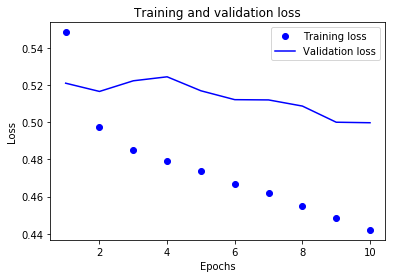

In [58]:
import matplotlib.pyplot as plt

loss = history.history['loss']

val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')

plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.legend()

plt.show()

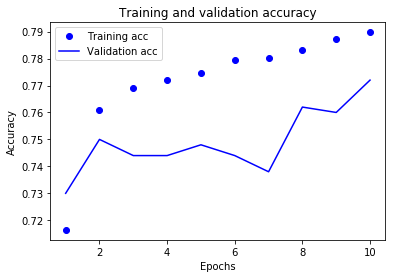

In [59]:
plt.clf()

acc = history.history['acc']

val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')

plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuracy')

plt.xlabel('Epochs')

plt.ylabel('Accuracy')

plt.legend()

plt.show()

### step 5: Final Performance Evaluation

In [60]:
score = model.evaluate(X_test,Y_test, verbose=1)
print("Accuracy: %.2f%%" % (score[1]*100))

34604/34604 [==============================] - 2s 49us/step
Accuracy: 76.16%


In [61]:
pos_cnt, neg_cnt, pos_correct, neg_correct = 0, 0, 0, 0
for x in range(len(X_val)):
    
    result = model.predict(X_val[x].reshape(1,X_test.shape[1]),batch_size=1,verbose = 2)[0]
   
    if np.argmax(result) == np.argmax(Y_val[x]):
        if np.argmax(Y_val[x]) == 0:
            neg_correct += 1
        else:
            pos_correct += 1
       
    if np.argmax(Y_val[x]) == 0:
        neg_cnt += 1
    else:
        pos_cnt += 1



print("positive_acc", pos_correct/pos_cnt*100, "%")
print("negative_acc", neg_correct/neg_cnt*100, "%")

# see: https://dzone.com/articles/sentiment-analysis-on-us-twitter-airlines-dataset

positive_acc 82.64150943396227 %
negative_acc 71.06382978723404 %


## Stacked LSTM

### Step 1: Reshape the data to fit the 3D tensor in stacked-LSTM network.

In [62]:
# reshape the vector from 2D to 3D to fit the stacked-LSTM model.
# Thus, shape changes say from (104858, 28) to (52429,2,28),because 52429*2=104858.

timesteps =2

#reshape input
x_train_s= X_train.reshape(int(X_train.shape[0]/timesteps), timesteps, X_train.shape[1])
y_train_s= Y_train.reshape(int(Y_train.shape[0]/timesteps), timesteps, Y_train.shape[1])

x_test_s=X_test.reshape(int(X_test.shape[0]/timesteps), timesteps, X_test.shape[1])
y_test_s=Y_test.reshape(int(Y_test.shape[0]/timesteps), timesteps, Y_test.shape[1])

print(x_train_s.shape,y_train_s.shape)

print(x_test_s.shape,y_test_s.shape)

(35127, 2, 28) (35127, 2, 2)
(17302, 2, 28) (17302, 2, 2)


### Step 2: Build a Sequential model with stacked LSTM.

In [50]:
# Here, we follow the Keras documentation to build a 3-stack LSTM model.
model_s = Sequential()

# input layer with the dropout rate=50%
model.add(Embedding(max_review_length, embedding_vecor_length ,input_length = X.shape[1])) 
model.add(Dropout(0.5))

# first stack LSTM layer, we expect it checks 2 points of observation in each tweet and 16 features at each time step.
model_s.add(LSTM(lstm_dim,dropout=0.2, recurrent_dropout=0.2, return_sequences=True, input_shape=(2,28))) 

# second stack 
model_s.add(LSTM(lstm_dim, dropout=0.2, recurrent_dropout=0.2,return_sequences=True))  

# third stack 
model_s.add(LSTM(lstm_dim, return_sequences=True))  

#output layer
model_s.add(Dense(2, activation='softmax'))

#compliation
model_s.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
            
print(model_s.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 2, 32)             7808      
_________________________________________________________________
lstm_4 (LSTM)                (None, 2, 32)             8320      
_________________________________________________________________
lstm_5 (LSTM)                (None, 2, 32)             8320      
_________________________________________________________________
dense_3 (Dense)              (None, 2, 2)              66        
Total params: 24,514
Trainable params: 24,514
Non-trainable params: 0
_________________________________________________________________
None


### Step 3: Reset the training, validatation, and testing datasets.

In [51]:
# select some for training

x_val_s = x_train_s[:500]

y_val_s= y_train_s[:500]

# select some for training

partial_x_train_s = x_train_s[500:]

partial_y_train_s = y_train_s[500:]

### Step 4: Fit the stacked model

In [52]:
history_s = model_s.fit(partial_x_train_s, 
                    partial_y_train_s,
                    batch_size=50,
                    epochs = 10, 
                    verbose=1, 
                    validation_data=(x_val_s,y_val_s),shuffle=False)

Train on 34627 samples, validate on 500 samples
Epoch 1/10
34627/34627 [==============================] - 50s 1ms/step - loss: 0.6916 - acc: 0.5244 - val_loss: 0.6903 - val_acc: 0.5220
Epoch 2/10
34627/34627 [==============================] - 2s 59us/step - loss: 0.6909 - acc: 0.5287 - val_loss: 0.6892 - val_acc: 0.5250
Epoch 3/10
34627/34627 [==============================] - 2s 59us/step - loss: 0.6902 - acc: 0.5303 - val_loss: 0.6888 - val_acc: 0.5410
Epoch 4/10
34627/34627 [==============================] - 2s 59us/step - loss: 0.6904 - acc: 0.5308 - val_loss: 0.6894 - val_acc: 0.5370
Epoch 5/10
34627/34627 [==============================] - 2s 59us/step - loss: 0.6903 - acc: 0.5276 - val_loss: 0.6902 - val_acc: 0.5350
Epoch 6/10
34627/34627 [==============================] - 2s 60us/step - loss: 0.6903 - acc: 0.5316 - val_loss: 0.6911 - val_acc: 0.5410
Epoch 7/10
34627/34627 [==============================] - 2s 61us/step - loss: 0.6898 - acc: 0.5322 - val_loss: 0.6909 - val_acc: 

* The accuracy of the stacked model is round 0.53 which is much better than flipping the coin. To improve the accuracy, we might need to put more data into the training set, and tune the arguments in the layers.

### How To Improve Deep Learning Performance?

* Improve Performance With Data.
* Improve Performance With Algorithms.
* Improve Performance With Algorithm Tuning.
* Improve Performance With Ensembles.

Check this out: https://machinelearningmastery.com/improve-deep-learning-performance/